## Deep Neural Networks using Keras

In [18]:
import tensorflow as tf

from tensorflow.keras import models
from tensorflow.keras import layers

import random
import numpy as np

In [19]:
random.seed(42) # Initialize the random number generator
np.random.seed(42)

#### Dataset

MNIST (Modified National Institute of Standards and Technology) dataset, which contains:
- Training set: 60,000 grayscale images of handwritten digits (0-9)
- Test set: 10,000 grayscale images of handwritten digits (0-9)
- Image size: 28x28 pixels
- Pixel values: 0-255 (grayscale intensities)

In [20]:
# Using the MNIST dataset of Keras
mnist = tf.keras.datasets.mnist

(Xtrain, Ytrain), (Xtest, Ytest)  = mnist.load_data()

Text(0.5, 1.0, 'Ground Truth (Test): 7')

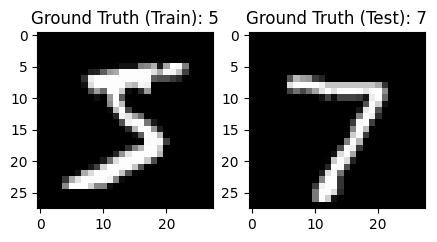

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(Xtrain[0, :, :], cmap="gray")
plt.title(f"Ground Truth (Train): {Ytrain[0]}")

# Display the first image in testing data
plt.subplot(122)
plt.imshow(Xtest[0, :, :], cmap="gray")
plt.title(f"Ground Truth (Test): {Ytest[0]}")

In [22]:
# Size if the datasets
print(Xtrain.shape)
print(Xtest.shape)
print(Ytrain.shape)
print(Ytest.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [23]:
# Print a sample data
print('Xtrain \n', Xtrain[10,10])
print('Xtest \n', Xtest[10,10])
print('Ytrain \n', Ytrain[10,])
print('Ytest \n', Ytest[10,])

Xtrain 
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  24 209 254 254 254
 171   0   0   0   0   0   0   0   0   0]
Xtest 
 [  0   0   0   0   0   0   0   0 194 254 103   0   0   0   0   0   0   0
   0   0 150 254 213   0   0   0   0   0]
Ytrain 
 3
Ytest 
 0


In [24]:
# Normalize the data

# 60000 images are there in the train set
# 10000 images are there in the test set

Xtrain = Xtrain.reshape((60000, 28 * 28)) # reshape the input set to size 28 * 28
Xtrain = Xtrain.astype("float32") / 255 # Normalize the grayscale; set datatype as float32

Xtest = Xtest.reshape((10000, 28 * 28))
Xtest = Xtest.astype("float32") / 255

Ytrain = tf.keras.utils.to_categorical(Ytrain)
Ytest = tf.keras.utils.to_categorical(Ytest)

In [25]:
# print a sample data
print('Xtrain \n', Xtrain[10,10])
print('Xtest \n', Xtest[10,10])
print('Ytrain \n', Ytrain[10,])
print('Ytest \n', Ytest[10,])

Xtrain 
 0.0
Xtest 
 0.0
Ytrain 
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Ytest 
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


#### DNN Model

Using keras, creating the DNN or sequential model"

In [26]:
# Create a model object
dnnModel = models.Sequential()

Specifying the number of neurons in each layer and the activation function used in each layer

In [27]:
# Layer 1: hidden layer
dnnModel.add(layers.Dense(50, activation="relu", input_shape=(28 * 28, )))

# Layer 2: hidden layer
dnnModel.add(layers.Dense(60, activation="relu"))

# Layer 3: hidden layer
dnnModel.add(layers.Dense(30, activation="relu"))

# Layer 4: Output layer
# Numer of neurons = number of digits 0-9 (total 10)
dnnModel.add(layers.Dense(10, activation="softmax"))

dnnModel.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (None, 50)                  │          39,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 60)                  │           3,060 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 30)                  │           1,830 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 10)                  │             310 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,450 (173.63 KB)

 Trainable params: 44,450 (173.63 KB)

 Non-trainable params: 0 (0.00 B)

#### Regularization and Optimizations of DNN

In [35]:
# Configure  the model for training, by using appropriate optimizers and regularizations
# Available optimizer: adam, rmsprop, adagrad, sgd
# Available loss: categorical_crossentropy, binary_crossentropy, mean_squared_error
# Metrics: List of metrics to be evaluated by the model during training and testing. 

dnnModel.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])

#### Training the Model

In [36]:
h = dnnModel.fit(Xtrain, Ytrain, epochs=25, validation_split=0.1, batch_size=64)

Epoch 1/25
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3363 - loss: 1.9908 - val_accuracy: 0.8725 - val_loss: 0.5368
Epoch 2/25
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8576 - loss: 0.5301 - val_accuracy: 0.9173 - val_loss: 0.3088
Epoch 3/25
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8936 - loss: 0.3766 - val_accuracy: 0.9288 - val_loss: 0.2599
Epoch 4/25
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9101 - loss: 0.3143 - val_accuracy: 0.9350 - val_loss: 0.2348
Epoch 5/25
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9178 - loss: 0.2832 - val_accuracy: 0.9430 - val_loss: 0.2093
Epoch 6/25
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9236 - loss: 0.2644 - val_accuracy: 0.9455 - val_loss: 0.1907
Epoch 7/25
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9310 - loss: 0.2359 - val_accuracy: 0.9453 - val_loss: 0.1817
Epoch 8/25
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9361 - loss: 0.2187 - val_accuracy: 0.

In [37]:
print("Final training accuracy", h.history["accuracy"][-1])
print("Final validation accuracy", h.history["val_accuracy"][-1])

Final training accuracy 0.9734629392623901
Final validation accuracy 0.9736666679382324


#### Testing the Model

In [38]:
test_loss, test_accuracy = dnnModel.evaluate(Xtest, Ytest)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9591 - loss: 0.1323


In [39]:
print(f"Testing loss: {test_loss}")
print(f"Testing accuracy: {test_accuracy}")

Testing loss: 0.11589344590902328
Testing accuracy: 0.9648000001907349


In [40]:
num_classes = 9

# Target names
target_names = ["Class {}".format(i) for i in range(num_classes)]

Ytrue = np.argmax(Ytest, axis=1)

# Predict labels
Ypredicted = dnnModel.predict(Xtest)
Ypredicted = np.argmax(np.round(Ypredicted), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


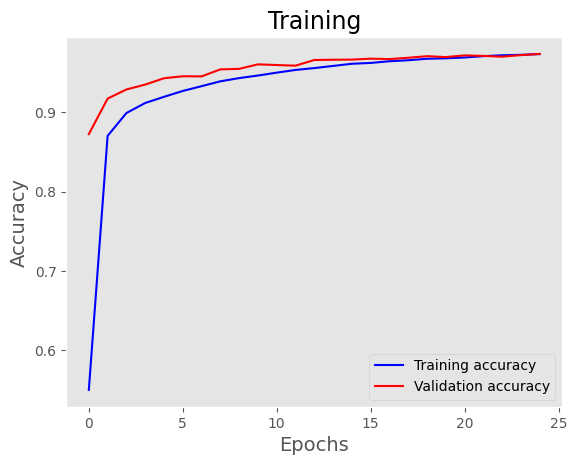

In [44]:
import matplotlib.pyplot as plt

accuracy = h.history["accuracy"]
val_accuracy = h.history["val_accuracy"]

# Plot loss and accuracy
epochs = range(len(accuracy))

plt.style.use('ggplot')
plt.plot(epochs, accuracy, 'blue', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'red', label='Validation accuracy')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Training', fontsize=17)
plt.legend(loc='lower right') 
plt.grid(None)

plt.show()

[[ 969    1    0    1    0    2    4    1    2    0]
 [   3 1119    2    1    0    1    5    2    2    0]
 [  17    1  992    2    3    1    4    5    5    2]
 [   9    0    6  969    0    8    0    5    7    6]
 [  10    0    3    0  945    0    6    2    1   15]
 [  17    1    0    9    0  843    8    2    8    4]
 [   9    3    2    0    5    6  932    0    1    0]
 [  12    9   13    0    0    0    0  975    3   16]
 [  23    1    4    5    6    6    8    6  910    5]
 [  15    6    0    6   13    1    0    4    0  964]]


<Axes: >

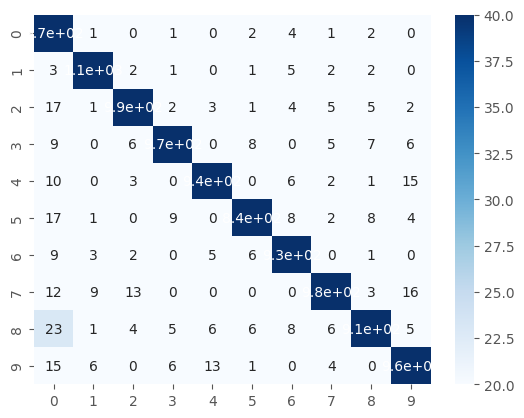

In [47]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Ytrue, Ypredicted)
print(cm)
df_cm = pd.DataFrame(cm)

sn.heatmap(df_cm, annot=True, vmin=20, vmax=40, cmap="Blues")

In [48]:
from sklearn.metrics import classification_report

print(classification_report(Ytrue, Ypredicted))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       980
           1       0.98      0.99      0.98      1135
           2       0.97      0.96      0.97      1032
           3       0.98      0.96      0.97      1010
           4       0.97      0.96      0.97       982
           5       0.97      0.95      0.96       892
           6       0.96      0.97      0.97       958
           7       0.97      0.95      0.96      1028
           8       0.97      0.93      0.95       974
           9       0.95      0.96      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000

